In [1]:
from pathlib import Path
from asim.dataset.scene.arrow_scene import ArrowScene

<Axes: title={'center': 'Map: carla_town03'}>

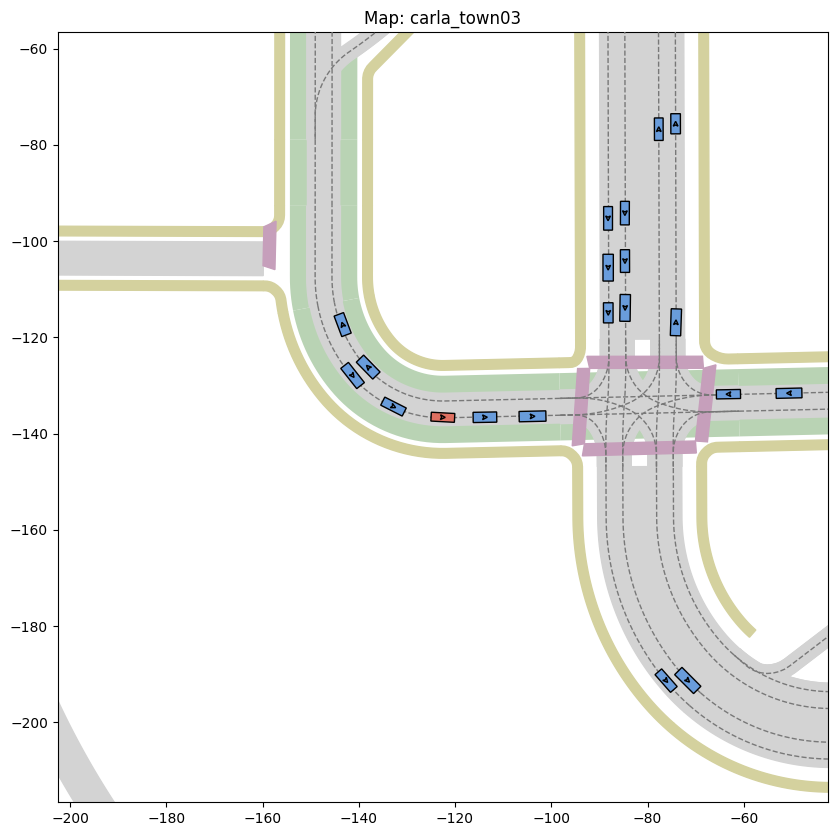

In [2]:
from typing import Optional, Tuple, Union

import matplotlib.pyplot as plt

import numpy as np

from asim.common.geometry.base import Point2D
from asim.common.geometry.bounding_box.bounding_box import BoundingBoxSE2, BoundingBoxSE3
from asim.common.geometry.tranform_2d import translate_along_yaw
from asim.common.visualization.color.color import ELLIS_5
from asim.dataset.scene.abstract_scene import AbstractScene

from asim.common.visualization.matplotlib.map import add_default_map_on_ax
from asim.common.visualization.matplotlib.observation import add_box_detections_to_ax, add_ego_vehicle_to_ax, add_traffic_lights_to_ax



def plot_scene_at_iteration(scene: AbstractScene, iteration: int = 0, ax: Optional[plt.Axes] = None):

    radius = 100

    ego_vehicle_state = scene.get_ego_vehicle_state_at_iteration(iteration)
    box_detections = scene.get_box_detections_at_iteration(iteration)
    traffic_light_detections = scene.get_traffic_light_detections_at_iteration(iteration)
    map_api = scene.map_api

    point_2d = ego_vehicle_state.bounding_box.center.state_se2.point_2d

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    add_default_map_on_ax(ax, map_api, point_2d, radius=radius)
    add_traffic_lights_to_ax(ax, traffic_light_detections, map_api)

    add_box_detections_to_ax(ax, box_detections)
    add_ego_vehicle_to_ax(ax, ego_vehicle_state)

    buffer_radius = 0.8 * radius
    ax.set_xlim(point_2d.x - buffer_radius, point_2d.x + buffer_radius)
    ax.set_ylim(point_2d.y - buffer_radius, point_2d.y + buffer_radius)

    ax.set_aspect("equal", adjustable="box")

    return ax


# log_name = "2021.08.30.14.54.34_veh-40_00439_00835"
# log_file = Path(f"/home/daniel/asim_workspace/data/mini/{log_name}.arrow")
log_name = "Town12_Rep0_longest6_route12_06_03_21_22_50"
log_file = Path(f"/home/daniel/asim_workspace/data/carla/{log_name}.arrow")
scene = ArrowScene(log_file)

plot_scene_at_iteration(scene, iteration=3000)

In [ ]:

import traceback
import matplotlib.animation as animation

import io

from PIL import Image
from tqdm import tqdm
import matplotlib.animation as animation

def create_animation_mp4(start_idx=0, end_idx=None, step=10, fps=20):
    if end_idx is None:
        end_idx = len(scene._recording_table)

    fig, ax = plt.subplots(figsize=(10, 10))

    def update(i):
        ax.clear()
        plot_scene_at_iteration(scene, i, ax)
        # Adjust border size (white space) around the figure
        plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
        pbar.update(1)

    frames = list(range(start_idx, end_idx, step))
    pbar = tqdm(total=len(frames))
    ani = animation.FuncAnimation(fig, update, frames=frames, repeat=False)

    ani.save(f"{log_name}.mp4", writer='ffmpeg', fps=fps, dpi=300)
    plt.close(fig)


# # Create an mp4 animation with a specific FPS
output_path = Path("/home/daniel/asim_logs_videos")
log_path = Path("/home/daniel/asim_workspace/data/carla")
for log_file in log_path.iterdir():
    print(f"Processing {log_file.stem}...")
    log_name = log_file.stem
    scene = ArrowScene(log_file)
    try:
        create_animation_mp4(scene, output_path, fps=30, end_idx=None, step=5)
    except Exception as e:
        traceback.print_exc()
        erroneous_file = output_path / f"{log_name}.mp4"
        if erroneous_file.exists():
            erroneous_file.unlink()
    del scene





Processing Town12_Rep0_longest6_route10_06_03_21_21_35...
Processing Town12_Rep0_longest6_route5_06_03_21_17_39...
Processing Town12_Rep0_longest6_route11_06_03_21_22_10...
Processing Town12_Rep0_longest6_route9_06_03_21_20_22...
Processing Town12_Rep0_longest6_route7_06_03_21_18_44...
Processing Town12_Rep0_longest6_route17_06_03_21_40_12...
Processing Town12_Rep0_longest6_route3_06_03_21_04_21...
Processing Town12_Rep0_longest6_route20_06_03_21_49_46...
Processing Town12_Rep0_longest6_route14_06_03_21_31_41...
Processing Town12_Rep0_longest6_route13_06_03_21_29_31...
Processing Town12_Rep0_longest6_route15_06_03_21_34_00...
Processing Town12_Rep0_longest6_route19_06_03_21_45_48...
Processing Town12_Rep0_longest6_route1_06_03_21_02_12...
Processing Town12_Rep0_longest6_route18_06_03_21_42_03...
Processing Town12_Rep0_longest6_route8_06_03_21_19_34...


Traceback (most recent call last):
  File "/home/daniel/anaconda3/envs/asim/lib/python3.13/site-packages/matplotlib/animation.py", line 224, in saving
    yield self
  File "/home/daniel/anaconda3/envs/asim/lib/python3.13/site-packages/matplotlib/animation.py", line 1122, in save
    anim._draw_next_frame(d, blit=False)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^
  File "/home/daniel/anaconda3/envs/asim/lib/python3.13/site-packages/matplotlib/animation.py", line 1158, in _draw_next_frame
    self._post_draw(framedata, blit)
    ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/home/daniel/anaconda3/envs/asim/lib/python3.13/site-packages/matplotlib/animation.py", line 1183, in _post_draw
    self._fig.canvas.draw_idle()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/home/daniel/anaconda3/envs/asim/lib/python3.13/site-packages/matplotlib/backend_bases.py", line 1891, in draw_idle
    self.draw(*args, **kwargs)
    ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/home/daniel/anaconda3/envs/asim/lib/python3.13/site-pa

Processing Town12_Rep0_longest6_route2_06_03_21_03_30...
